----
CC5201-1 Bases de Datos Multimedia.<br>
Genesis Moraga Azócar <br>           
***


# Tarea 4
***

##Parte I:
#### Generación de Espacios Métricos y cálculo del radio promedio.

En primer lugar, se deben generar espacios de 100,000 vectores uniformemente distribuídos en el cubo unitario, con dimensiones 2D, 6D, 10D, y 20D.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random, randint, uniform

In [2]:
#Creación de puntos aleatorios para cada dimensión
p2D=np.random.rand(100000,2)
p6D=np.random.rand(100000,6)
p10D=np.random.rand(100000,10)
p20D=np.random.rand(100000,20)

A continuación, se crea la función que calculará, en promedio, cuál es el radio que se debería usar para retornar el 0.1% de objetos de la base de datos (en este caso, 100 objetos).

Esta función, elige mil puntos aleatorios del espacio, y por cada uno calcula un radio que permite recuperar 100 objetos. Finalmente, retorna el promedio de todos los radios obtenidos por cada punto aleatorio escogido.

Cabe destacar que en todos los calculos de distancias se usa $L_1$.

In [3]:
def radio_prom(puntos):
  num_pts=np.shape(puntos)[0]
  radios=np.zeros(1000)
  for j in range(1000):
    obj_alt=puntos[randint(0,num_pts-1)]

    d_obj_pts=np.zeros(num_pts)

    for i in range(num_pts):
      d_obj_pts[i]=np.sum(np.absolute(puntos[i] - obj_alt))

    ord=np.argsort(d_obj_pts)
    radios[j]=d_obj_pts[ord[100]] 

  prom_r=np.mean(radios)
  return prom_r


Luego, se procede a calcular el radio promedio para cada espacio.

In [4]:
#Se calcula el radio promedio para cada dimensión
promRad_2=radio_prom(p2D)
promRad_6=radio_prom(p6D)
promRad_10=radio_prom(p10D)
promRad_20=radio_prom(p20D)

print("Radio promedio 2D: ", promRad_2)
print("Radio promedio 6D: ", promRad_6)
print("Radio promedio 10D: ", promRad_10)
print("Radio promedio 20D: ", promRad_20)

Radio promedio 2D:  0.022658184445641702
Radio promedio 6D:  0.5210521931033318
Radio promedio 10D:  1.3199004624197268
Radio promedio 20D:  3.7214284492526795


##Parte II:
####  Construcción del Índice y complejidad de las consultas.

Para calcular la complejidad promedio de las consultas se crea una función, donde se usarán 10 mil objetos como datos y 200 objetos de prueba. Está función calcula los pivotes que se le piden, para luego computar la matriz de indices(que contiene la distancia de los objetos a los pivotes) y, finalmente, calcula la complejidad de la consulta al saber el número de objetos que se descartaron gracias a los pivotes.

In [5]:
def prom_compl(puntos, numpiv, dim, radio):
  datos=puntos[0:10000]
  pruebas=puntos[10000:10200]

  #calculo de pivotes
  piv=np.zeros((numpiv,dim))
  for i in range(numpiv):
    piv[i]=datos[randint(0,10000-1)]

  #calculo de índices
  matrizInd=np.zeros((10000,numpiv))
  for i in range(10000):
    for j in range(numpiv):
      matrizInd[i][j]=np.sum(np.absolute(datos[i] - piv[j]))

  #Consultas(200). Se descartarán los objetos según las distancia a los pivotes.
  #Para ahorrar tiempo no se calculará distancia del objeto de consulta a los no descartados, 
  #ya que con solo saber el total de estos, se sabe la complejidad externa.
  resp=np.ones((200,10000))
  for q in range(200):
    for p in range(10):
      d_pq=np.sum(np.absolute(pruebas[q] - piv[p])) #por cada pivote calculo una distancia
      for d in range(10000):
        d_pu=matrizInd[d][p]
        dif=abs(d_pq - d_pu)
        if (dif > radio): 
          resp[q][d]=0      #se descarta
  complejidad=np.mean(np.sum(resp,axis=1))+numpiv #total de objetos no descartados + cantidad de pivotes
  return complejidad


A continuación, se computan las complejidades promedio por cada espacio y número de pivotes.

In [6]:
ks=[10, 20, 30, 50, 100, 500, 1000]
compl2D=[]
compl6D=[]
compl10D=[]
compl20D=[]
kstr=[]
for k in ks:
  compl2D.append(prom_compl(p2D,k,2,promRad_2))
  compl6D.append(prom_compl(p6D,k,6,promRad_6))
  compl10D.append(prom_compl(p10D,k,10,promRad_10))
  compl20D.append(prom_compl(p20D,k,20,promRad_20))
  kstr.append(str(k))

Luego, se muestran los gráficos obtenidos para cada espacio. 

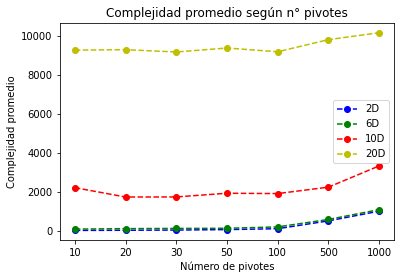

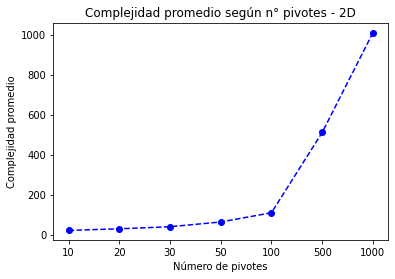

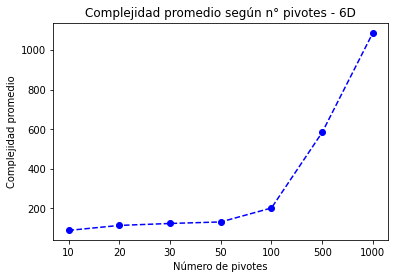

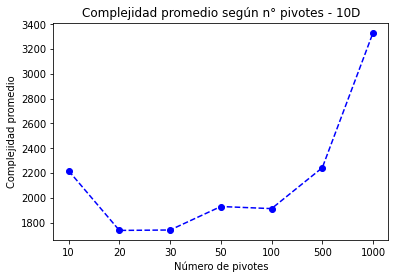

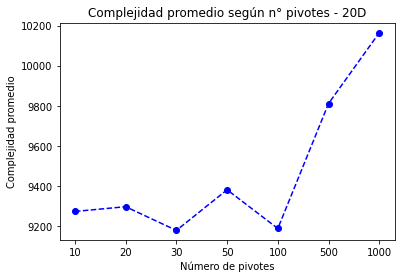

In [7]:
plt.figure()
plt.plot(kstr, compl2D,'bo--')
plt.plot(kstr, compl6D,'go--')
plt.plot(kstr, compl10D,'ro--')
plt.plot(kstr, compl20D,'yo--')
plt.title("Complejidad promedio según n° pivotes")
plt.xlabel("Número de pivotes")
plt.ylabel("Complejidad promedio")
plt.legend(("2D","6D","10D","20D"))
plt.show()

plt.figure()
plt.plot(kstr, compl2D,'bo--')
plt.title("Complejidad promedio según n° pivotes - 2D")
plt.xlabel("Número de pivotes")
plt.ylabel("Complejidad promedio")
plt.show()

plt.figure()
plt.plot(kstr, compl6D,'bo--')
plt.title("Complejidad promedio según n° pivotes - 6D")
plt.xlabel("Número de pivotes")
plt.ylabel("Complejidad promedio")
plt.show()

plt.figure()
plt.plot(kstr, compl10D,'bo--')
plt.title("Complejidad promedio según n° pivotes - 10D")
plt.xlabel("Número de pivotes")
plt.ylabel("Complejidad promedio")
plt.show()

plt.figure()
plt.plot(kstr, compl20D,'bo--')
plt.title("Complejidad promedio según n° pivotes - 20D")
plt.xlabel("Número de pivotes")
plt.ylabel("Complejidad promedio")
plt.show()

###Análisis de resultados:
Los resultados obtenidos como radio promedio aumentan a medida que aumenta la dimensión, lo que tiene sentido ya que la distancia $L_1$ suma todas las componentes de un vector.

En los gráficos, se puede observar que cuando la cantidad de pivotes es baja, la complejidad varia poco, puede aumentar, en otros casos disminuir, depende del experimento. Sin embargo, llega un punto en que al aumentar los pivotes las complejidades también lo hacen, tanto que la curva ya no vuelve a disminuir.

Por otra parte, al comparar la curva de las complejidades en distintas dimensiones, comienzan a suceder cosas interesantes:
 * A mayor dimensión las complejidades aumentan considerablemente, pasando del orden de 1.000 en $2D$ a 10.000 en $20D$, es decir, cada vez se descartan menos objetos.
 * En $2D$ y $6D$, la compejidad casi siempre aumenta, aunque en un principio lentamente, por lo se puede decir que no se necesitan tantos pivotes, con diez ya funciona bastante bien. En cambio, a medida que aumenta la dimensión la cantidad ideal de pivotes también, esto se ve en que en $10D$ el mejor resultado se tiene con 20 pivotes y en $20D$ con 30 pivotes. 

Todo lo anterior, se puede explicar con el hecho de que a mayor dimensión mayor es el espacio y muy pocos pivotes no logran cubrir lo suficiente de este espacio, pero tampoco me sirve tener demasiados, ya que voy aumentando la complejidad por cada pivote y, si lo hago, el número de objetos descartados no mejorá mucho por lo complicado y extenso del espacio en que estoy trabajando.

***